# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> *Selection
* Do you need to encode the target variable (Yes/No)?
> *Yes
* If yes, briefly explain why you need to encode the target variable.
> *For the classification  the machine learning algorithms need numerical input
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> * one-hot encoding
* Explain why you have selected the above encoding method.
> *It represents the categorical variables without ordinal relationship between categories

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [2]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Selection'] = label_encoder.fit_transform(df['Selection'])
# Select the appropriate encode

# Transform the target variable


display(df)

,Exam Mark,test score,Selection
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


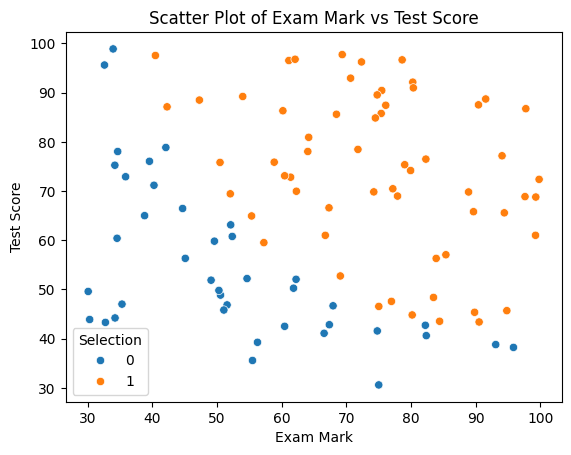

In [4]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns

# sns.________(____,x = ____,y=___,hue =____)
import seaborn as sns

sns.scatterplot(data=df, x='Exam Mark', y='test score', hue='Selection')

plt.title('Scatter Plot of Exam Mark vs Test Score')

plt.xlabel('Exam Mark')

plt.ylabel('Test Score')

plt.show()

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [5]:
# Write a function 'predict' to compute the logistic Regression model

def Sigmoid(z):
  pass  # remove it after completing your code

def predict(w,b,x):
  # Your code
  pass # remove it after completing your code

<ipython-input-29-0ccfdf18c519>:43: RuntimeWarning: divide by zero encountered in log
  train_loss = -np.mean(y_train * np.log(y_hat) + (1 - y_train) * np.log(1 - y_hat))
<ipython-input-29-0ccfdf18c519>:43: RuntimeWarning: invalid value encountered in multiply
  train_loss = -np.mean(y_train * np.log(y_hat) + (1 - y_train) * np.log(1 - y_hat))
<ipython-input-29-0ccfdf18c519>:48: RuntimeWarning: divide by zero encountered in log
  test_loss = -np.mean(y_test * np.log(y_hat_test) + (1 - y_test) * np.log(1 - y_hat_test))
<ipython-input-29-0ccfdf18c519>:48: RuntimeWarning: invalid value encountered in multiply
  test_loss = -np.mean(y_test * np.log(y_hat_test) + (1 - y_test) * np.log(1 - y_hat_test))


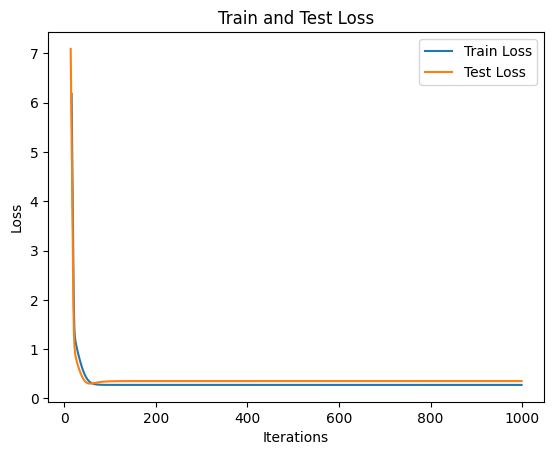

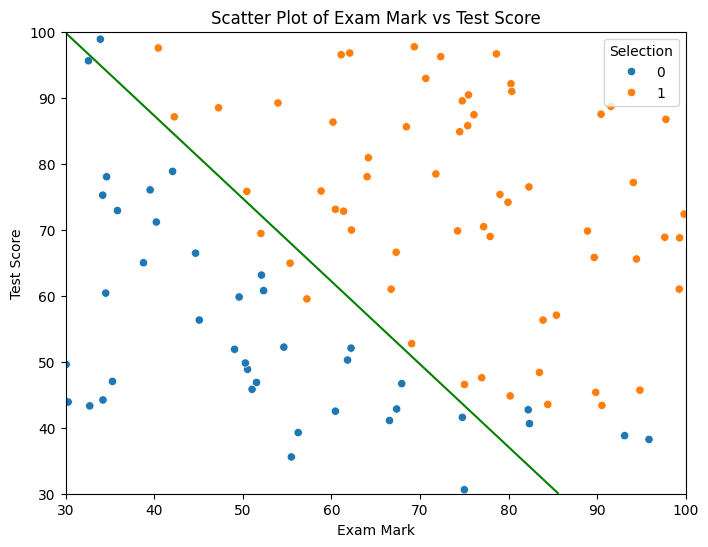

The student is predicted to pass the interview.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('interviewData.csv', header=None)
df.columns = ['Exam Mark', 'test score', 'Selection']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Selection'] = label_encoder.fit_transform(df['Selection'])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(w, b, x):
    z = np.dot(x, w) + b
    return sigmoid(z)

# Write a function to perform the gradient decent

def gradient_descent(w, b, X_train, y_train, alpha, num_iter):
    m = len(y_train)
    train_costs = []
    test_costs = []

    for i in range(num_iter):
        # Forward pass
        z = np.dot(X_train, w) + b
        y_hat = sigmoid(z)

        dw = np.dot(X_train.T, (y_hat - y_train)) / m
        db = np.sum(y_hat - y_train) / m

        w -= alpha * dw
        b -= alpha * db

        train_loss = -np.mean(y_train * np.log(y_hat) + (1 - y_train) * np.log(1 - y_hat))
        train_costs.append(train_loss)

        z_test = np.dot(X_test, w) + b
        y_hat_test = sigmoid(z_test)
        test_loss = -np.mean(y_test * np.log(y_hat_test) + (1 - y_test) * np.log(1 - y_hat_test))
        test_costs.append(test_loss)

    plt.plot(range(num_iter), train_costs, label='Train Loss')
    plt.plot(range(num_iter), test_costs, label='Test Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Train and Test Loss')
    plt.legend()
    plt.show()

    return w, b

np.random.seed(1)

w_ini = np.random.rand(2)

b_ini = -9

alpha = 0.001

num_iter = 1000

w_trained, b_trained = gradient_descent(w_ini, b_ini, X_train, y_train, alpha, num_iter)

student_data = np.array([65, 65])
probability_pass = predict(w_trained, b_trained, student_data.reshape(1, -1))

P = 0.5

plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Exam Mark', y='test score', hue='Selection')

plt.title('Scatter Plot of Exam Mark vs Test Score')

plt.xlabel('Exam Mark')

plt.ylabel('Test Score')

u = np.linspace(30, 100, 50)

v = np.linspace(30, 100, 50)

X_mesh, Y_mesh = np.meshgrid(u, v)

logReg = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        zz = X_mesh[i, j] * w_trained[0] + Y_mesh[i, j] * w_trained[1] + b_trained
        logReg[i, j] = 1 / (1 + np.exp(-zz))

plt.contour(u, v, logReg, levels=[P], colors="g")
plt.show()

if probability_pass >= P:
    print("The student is predicted to pass the interview.")
else:
    print("The student is predicted not to pass the interview.")


### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> *To evaluate the difference between the predicted values and the actual values.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> *It measures how good a machine learning model predicts the actual target values.
* What is a cost function?
> * It measures how good a machine learning model predicts the actual target values.
* What is the distinction between them?
> * Almost same

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [14]:
def compute_gradient_wb(w, b, x, y):
    m = len(y)
    # Forward pass
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)

    # Compute derivatives
    dw = np.dot(x.T, (y_hat - y)) / m
    db = np.sum(y_hat - y) / m

    return dw, db


In [22]:
# write a function to estimate the derivatives of the cost function

def compute_gradient_wb(w, b, x, y):
    m = len(y)

    z = np.dot(x, w) + b

    y_hat = sigmoid(z)

    dw = np.dot(x.T, (y_hat - y)) / m

    db = np.sum(y_hat - y) / m

    return dw, db


### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

## Model Training

In [ ]:
# Plot the train and test loss in one plot


### Answer the following


* What does the P value signify in the provided code?
> *Probability threshold.
* How will altering the P value affect the outcome?
> * Model's sensitivity to positive predictions.
* What range of values can P encompass?
> * 0 to 1
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> * It serves as clinical relevance of a classification model's predictions in tumor classification projects.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [35]:
student_data = np.array([65, 65])
probability_pass = predict(w_trained, b_trained, student_data.reshape(1, -1))

P = 0.5

if probability_pass >= P:
    print("The student is predicted to pass the interview.")
else:
    print("The student is predicted not to pass the interview.")
print("The probability of passing the interview: ",pass_probability[0])

The student is predicted to pass the interview.
The probability of passing the interview:  0.6449393168275962
